In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None #to show all rows
pd.options.display.max_columns = None #to show all columns

# For encoding categorical data
from sklearn.preprocessing import OneHotEncoder

# For scaling
from sklearn.preprocessing import RobustScaler

# For splitting data
from sklearn.model_selection import train_test_split

# For modelling
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

# For evaluation
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve

## Importing data

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory data analysis

In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.isnull().sum().max()

0

<b>Good No Null Values<b>

In [6]:
data.shape

(284807, 31)

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,7.094921e-13,1.875022e-12,1.053507e-12,7.137575e-13,-1.491369e-13,-5.225946e-13,-2.280687e-13,-6.428451e-13,4.958999e-13,7.060690e-13,1.766044e-12,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
amt=['Amount']
data[amt].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [11]:
cases = len(data)
nonfraud_count = len(data[data.Class == 0])
fraud_count = len(data[data.Class == 1])

print("Number of fraud cases out of {} total cases :".format(cases), fraud_count)
print("Number of non-fraud cases out of {} total cases :".format(cases), nonfraud_count)

Number of fraud cases out of 284807 total cases : 492
Number of non-fraud cases out of 284807 total cases : 284315


In [12]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

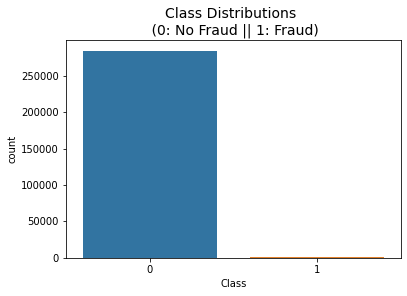

In [13]:
sns.countplot('Class', data=data, palette=None)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

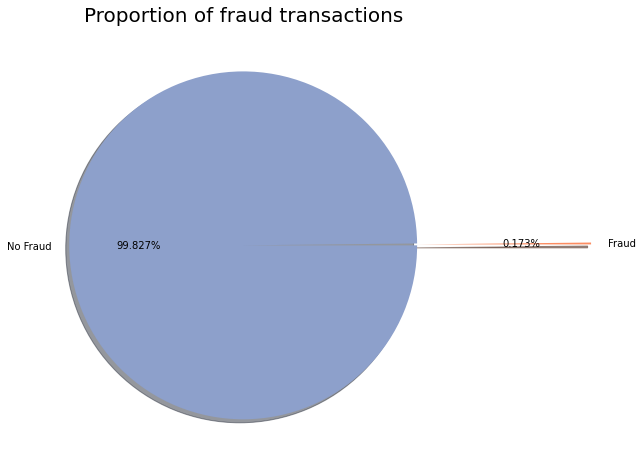

In [14]:
mpl_color = sns.color_palette('Set2')
plt.figure(figsize = (8, 8))
pie_data = [data.Class[data["Class"] == 1].count(), data.Class[data["Class"] == 0].count()]
pie_labels = ["Fraud", "No Fraud"]
plt.pie(pie_data, labels = pie_labels, explode = [1, 0], colors = mpl_color[1:3],shadow = True, autopct = "%.3f%%")
plt.title("Proportion of fraud transactions", size = 20)
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


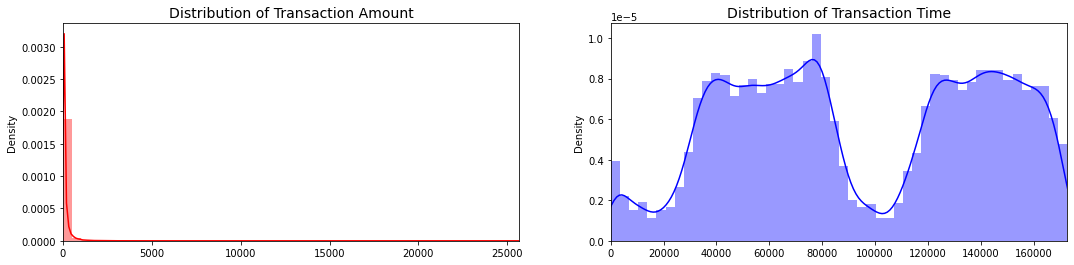

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## Data Manipulation

In [16]:
# dup = data[data.duplicated()]
# print("Number of duplicated records total:", len(dup))
# print("Number of duplicated records in Fraud cases:", len(dup[dup["Class"]==1]))
# print("Number of duplicated records in No Fraud cases:", len(dup[dup["Class"]==0]))

In [17]:
# total = len(data)
# data.drop_duplicates(inplace=True)
# print(total - len(data), " duplicated records removed")
# print("Total records left:", len(data))

<b>check for duplicates and remove them<b>

### Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [18]:
#from sklearn.preprocessing import StandardScaler, RobustScaler
# RobustScaler is less prone to outliers.
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [19]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Data Split

In [20]:
X_orig = data.loc[:,data.columns != "Class"]
y_orig = data.Class
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size = 0.2)

## Undersampling

In [21]:
data_train = pd.concat([X_train, y_train], axis=1)
print("Percentage distribution of fraud cases:", round(len(data_train[data_train.Class == 1])/len(data_train)*100, 3))
print("Number of Fraud cases in Training set:", len(data_train[data_train.Class == 1]))

# Lets shuffle the data before creating the new balanced dataframe
data_train = data_train.sample(frac=1)

fraud_data_train = data_train.loc[data_train['Class'] == 1]
non_fraud_data_train = data_train.loc[data_train['Class'] == 0][:len(fraud_data_train)]

balanced_data_train = pd.concat([fraud_data_train, non_fraud_data_train])

# Shuffle again
balanced_data_train = balanced_data_train.sample(frac=1, random_state=42)
print("Percentage distribution of fraud cases after balancing:", round(len(balanced_data_train[balanced_data_train.Class == 1])/len(balanced_data_train)*100, 3))
print("Number of Fraud cases in Training set after balancing:", len(balanced_data_train[balanced_data_train.Class == 1]))
#balanced_data_train.info()

Percentage distribution of fraud cases: 0.17
Number of Fraud cases in Training set: 388
Percentage distribution of fraud cases after balancing: 50.0
Number of Fraud cases in Training set after balancing: 388


In [22]:
balanced_data_train.shape

(776, 31)

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


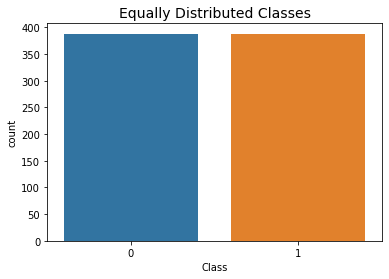

In [23]:
print('Distribution of the Classes in the subsample dataset')
print(balanced_data_train['Class'].value_counts()/len(balanced_data_train))

sns.countplot('Class', data=balanced_data_train, palette=None)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

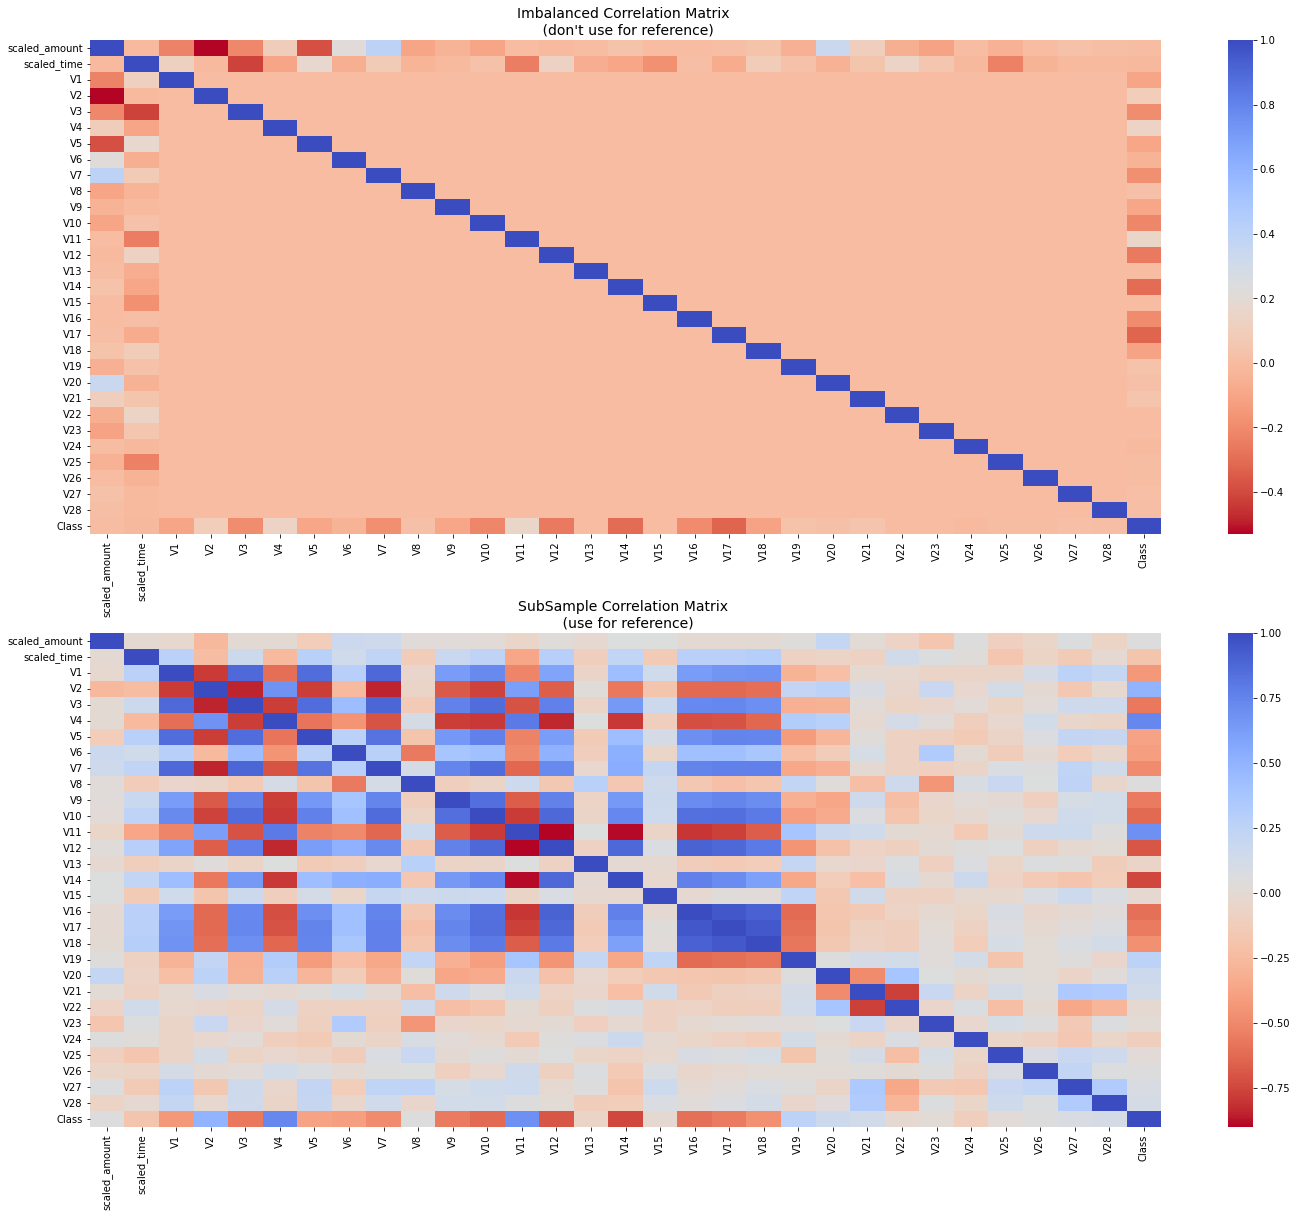

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# UnderSample dataset
sub_sample_corr = balanced_data_train.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## Negative Correlation

In [25]:
balanced_data_train.corr()["Class"].sort_values().head()

V14   -0.749206
V12   -0.695136
V10   -0.627813
V16   -0.600268
V3    -0.572431
Name: Class, dtype: float64

<b>Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    V14,V12,V10<b>

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

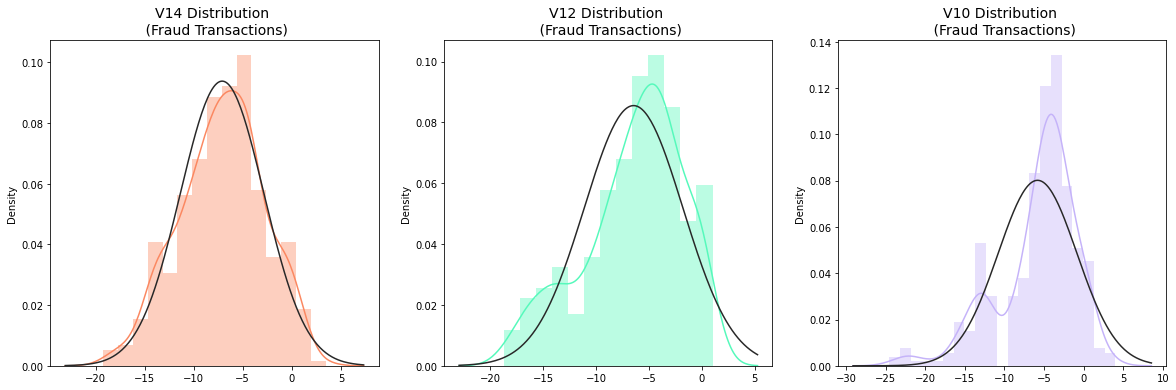

In [26]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = balanced_data_train['V14'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = balanced_data_train['V12'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = balanced_data_train['V10'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)


<AxesSubplot:xlabel='Class', ylabel='V10'>

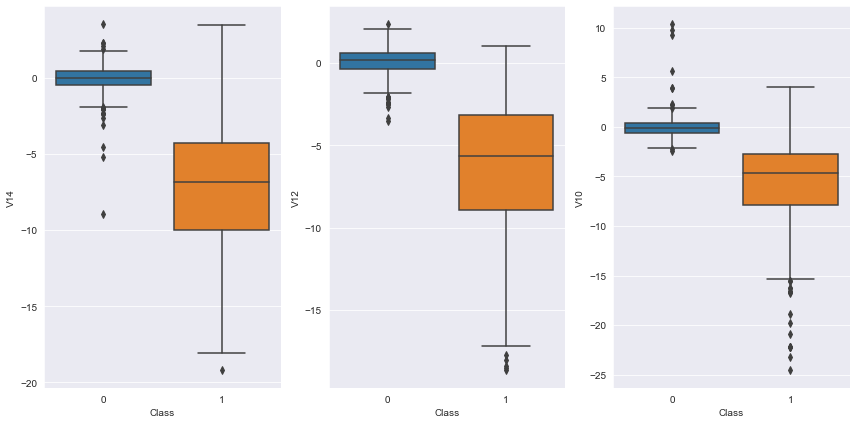

In [27]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=balanced_data_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=balanced_data_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=balanced_data_train, ax=ax[2])


## Removeing Outlier

In [28]:
out_features = ["V14", "V12", "V10"]
for feature in out_features:
    Q1 = balanced_data_train[feature].quantile(0.25)
    Q3 = balanced_data_train[feature].quantile(0.75)
    IQR = Q3-Q1
    top = Q3 + 1.5*IQR # Not necessary for negatively correlated features
    bottom = Q1 - 1.5*IQR

    index = balanced_data_train[(balanced_data_train[feature] < bottom)].index
    print(len(index), " number of", feature, " outliers removed from the dataset")
    balanced_data_train = balanced_data_train.drop(index)

5  number of V14  outliers removed from the dataset
30  number of V12  outliers removed from the dataset
39  number of V10  outliers removed from the dataset


<AxesSubplot:xlabel='Class', ylabel='V10'>

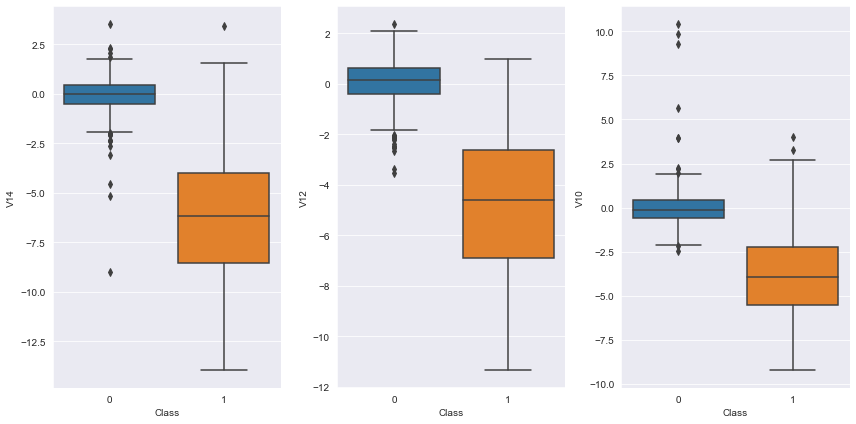

In [29]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=balanced_data_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=balanced_data_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=balanced_data_train, ax=ax[2])


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

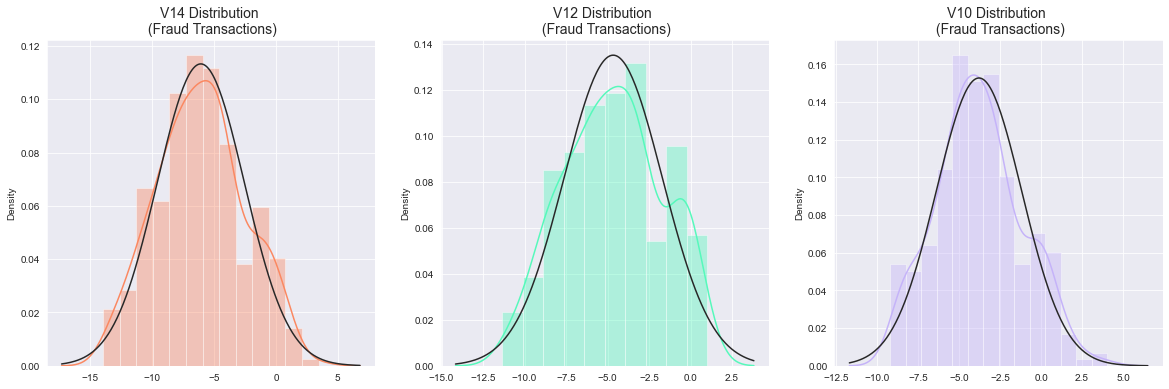

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = balanced_data_train['V14'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = balanced_data_train['V12'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = balanced_data_train['V10'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)


## Positive Correlation

In [31]:
balanced_data_train.corr()["Class"].sort_values(ascending=False).head()

Class    1.000000
V4       0.744588
V11      0.695294
V2       0.437012
V27      0.259711
Name: Class, dtype: float64

<b>Positive Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    V4,V11<b>

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'V11 Distribution \n (Fraud Transactions)')

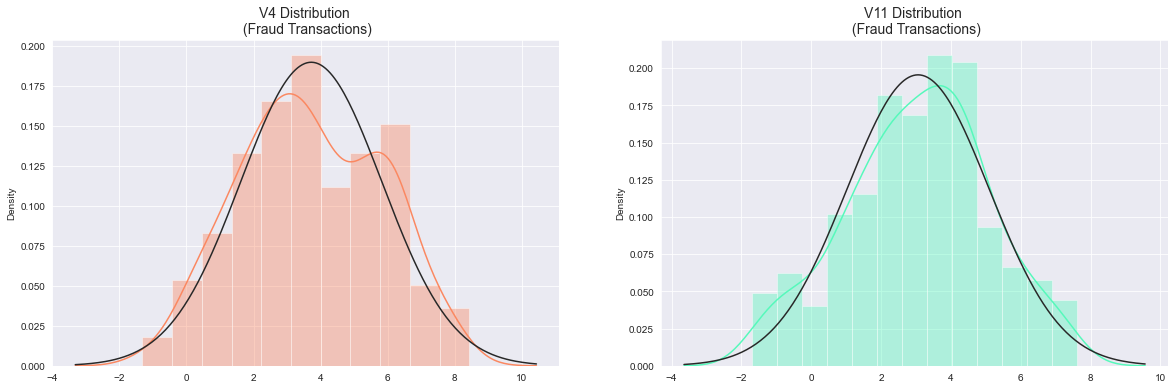

In [32]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

v4_fraud_dist = balanced_data_train['V4'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

v11_fraud_dist = balanced_data_train['V11'].loc[balanced_data_train['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

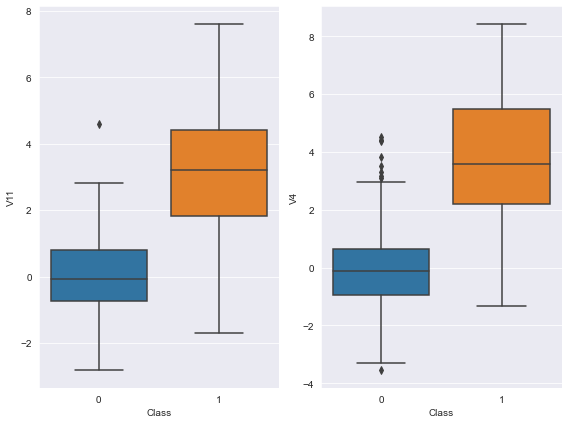

In [33]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=balanced_data_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=balanced_data_train, ax=ax[1])

plt.show()

<b>Not much outlier in V11,V4<b>

## Modelling after Undersampling

In [34]:
X_balanced = balanced_data_train.loc[:, balanced_data_train.columns != 'Class']
y_balanced = balanced_data_train.Class

In [35]:
y_balanced.value_counts()

0    388
1    314
Name: Class, dtype: int64

In [36]:
balanced_data_train['Class'].value_counts()

0    388
1    314
Name: Class, dtype: int64

In [37]:
y_train.value_counts()

0    227457
1       388
Name: Class, dtype: int64

## Logistic Regression

In [38]:
param_grid = {'penalty':['l1','l2'],'C': [0.1,0.5,1,10], 'max_iter' : [500, 750], 'tol':[0.00001,0.0001, 0.001]}
lr_grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5)
lr_grid.fit(X_balanced, y_balanced)
print(lr_grid.best_score_)    
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.9401519756838905
{'C': 10, 'max_iter': 500, 'penalty': 'l1', 'tol': 1e-05}
LogisticRegression(C=10, max_iter=500, penalty='l1', solver='liblinear',
                   tol=1e-05)


## Logistic regression - Fit best model

In [39]:
lr_model = LogisticRegression(penalty='l2',C=0.1, max_iter=500, solver='liblinear', tol=1e-05)
lr_model.fit(X_balanced, y_balanced)
lr_yhat = lr_model.predict(X_balanced)
print(classification_report(y_balanced, lr_yhat))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       388
           1       0.98      0.90      0.94       314

    accuracy                           0.95       702
   macro avg       0.95      0.94      0.94       702
weighted avg       0.95      0.95      0.95       702



## KNN Classifier

In [40]:
param_grid = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid.fit(X_balanced, y_balanced)

print(knn_grid.best_score_)    
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

0.9344579533941235
{'algorithm': 'auto', 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


## KNN - Fit best model

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_balanced, y_balanced)
knn_yhat = knn_model.predict(X_balanced)
print(classification_report(y_balanced, knn_yhat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       388
           1       0.99      0.93      0.96       314

    accuracy                           0.96       702
   macro avg       0.96      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702



## SVM Classifier

In [42]:
param_grid = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=5)
svc_grid.fit(X_balanced, y_balanced)

print(svc_grid.best_score_)    
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

0.937304964539007
{'C': 0.5, 'kernel': 'linear'}
SVC(C=0.5, kernel='linear')


## SVC - Fit best model

In [43]:
svc_model = SVC(C=0.5, kernel='linear')
svc_model.fit(X_balanced, y_balanced)
svc_yhat = svc_model.predict(X_balanced)
print(classification_report(y_balanced, svc_yhat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       388
           1       0.99      0.91      0.95       314

    accuracy                           0.95       702
   macro avg       0.96      0.95      0.95       702
weighted avg       0.96      0.95      0.95       702



## Random Forest Classifier

In [46]:
param_grid = {'max_depth': [5, 6, 7, 8], 'max_features': [4,5,6,7,8],'n_estimators':[100, 250, 500],'min_samples_split': [4, 5, 6, 7]}
rf_grid = GridSearchCV(RandomForestClassifier(),param_grid, cv=5)
rf_grid.fit(X_balanced, y_balanced)
print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

0.9458561296859169
{'max_depth': 7, 'max_features': 8, 'min_samples_split': 4, 'n_estimators': 250}
RandomForestClassifier(max_depth=7, max_features=8, min_samples_split=4,
                       n_estimators=250)


## RF - Fit best model

In [47]:
rf_model = RandomForestClassifier(max_depth=7, max_features=6, min_samples_split=5, n_estimators=100)
rf_model.fit(X_balanced, y_balanced)
rf_yhat = rf_model.predict(X_balanced)
print(classification_report(y_balanced, rf_yhat))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       388
           1       1.00      0.95      0.97       314

    accuracy                           0.98       702
   macro avg       0.98      0.97      0.98       702
weighted avg       0.98      0.98      0.98       702



Out of all the models and their given scores,<B> Random Forest Classifier gave the best results (97% accurucy)</B> in terms of Training and CV scores keeping in mind the generalization of model to avoid overfitting and still be able to predict accurately on unseen data.        
<B>Fitting the best model on test data:</B>

In [48]:
rf_test_yhat = rf_model.predict(X_test)
print(classification_report(y_test, rf_test_yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56858
           1       0.08      0.85      0.15       104

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962



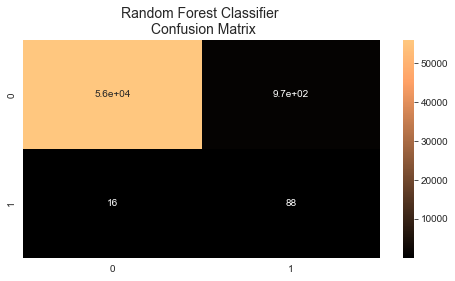

In [55]:
plt.figure(figsize = (8, 4))
rf_cf = confusion_matrix(y_test, rf_test_yhat)
sns.heatmap(rf_cf, annot=True, cmap=plt.cm.copper)
plt.title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
plt.show()

## RESULT

As we can see from the above test scores, the undersampling method in this scenario has not performed well for the model to train on the fraud cases properly. The model is still predicting 0 or Non fraud for a lot of the Fraud cases.
Out of all the actual fraud cases (110), model was able to predict 85% of them correctly (as fraud).
Out of all the predicted frauds, only 10% were actually fraud. It means that this model has made a lot of customers angry by accusing them of fraud, by mistake of course.

## Oversampling (SMOTE)

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [58]:
y_sm.value_counts()

0    227457
1    227457
Name: Class, dtype: int64

## Checking correlation after SMOTE

In [64]:
df_sm_train = pd.concat([X_sm, y_sm], axis=1)
df_sm_train.corr()["Class"].sort_values().head()

V14   -0.766895
V12   -0.693530
V10   -0.638567
V16   -0.602052
V9    -0.585750
Name: Class, dtype: float64

## Checking distribution using Boxplots

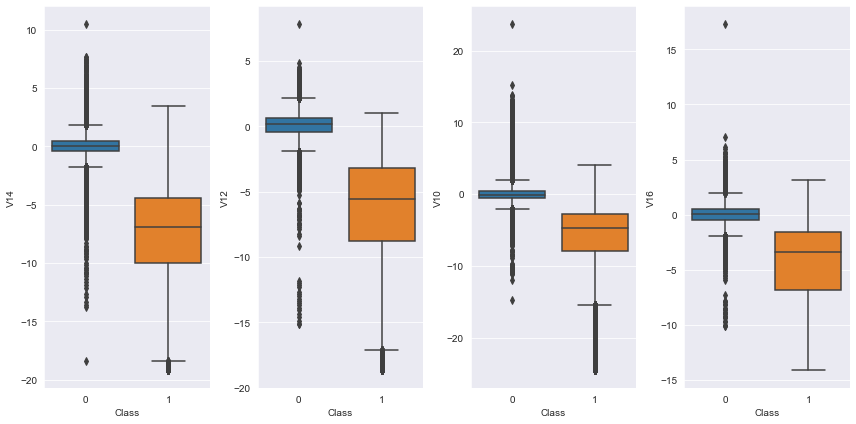

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=df_sm_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=df_sm_train, ax=ax[2])
sns.boxplot(x="Class",y="V16", data=df_sm_train, ax=ax[3])
plt.show()

In [67]:
df_sm_train.corr()["Class"].sort_values(ascending=False).head()

Class    1.000000
V4       0.725015
V11      0.708034
V2       0.511456
V19      0.278754
Name: Class, dtype: float64

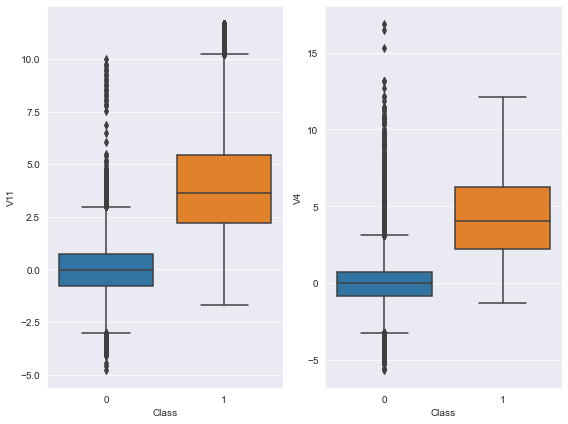

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=df_sm_train, ax=ax[1])

plt.show()

## Outlier Analysis after SMOTE

In [68]:
out_features = ["V14", "V12", "V10","V16"]
for feature in out_features:
    Q1 = df_sm_train[feature].quantile(0.25)
    Q3 = df_sm_train[feature].quantile(0.75)
    IQR = Q3-Q1
    top = Q3 + 1.5*IQR # Not necessary for negatively correlated features
    bottom = Q1 - 1.5*IQR

    index = df_sm_train[(df_sm_train[feature] < bottom)].index
    print(len(index), " number of", feature, " outliers removed from the dataset")
    df_sm_train = df_sm_train.drop(index)

2070  number of V14  outliers removed from the dataset
18631  number of V12  outliers removed from the dataset
22768  number of V10  outliers removed from the dataset
15443  number of V16  outliers removed from the dataset


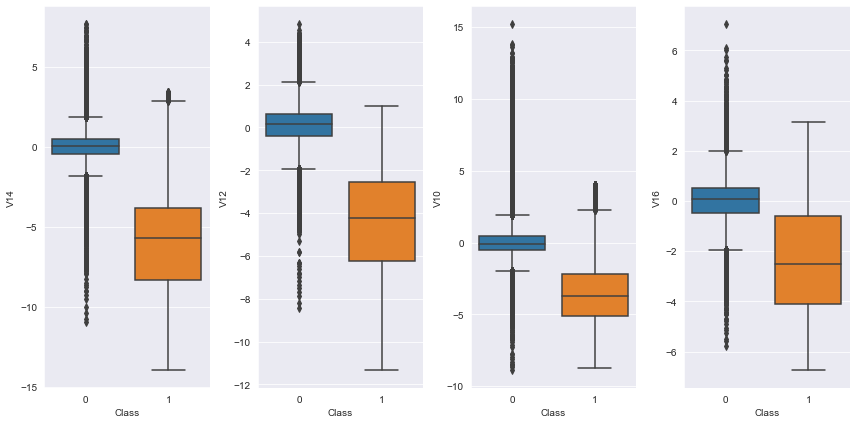

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=df_sm_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=df_sm_train, ax=ax[2])
sns.boxplot(x="Class",y="V16", data=df_sm_train, ax=ax[3])
plt.show()

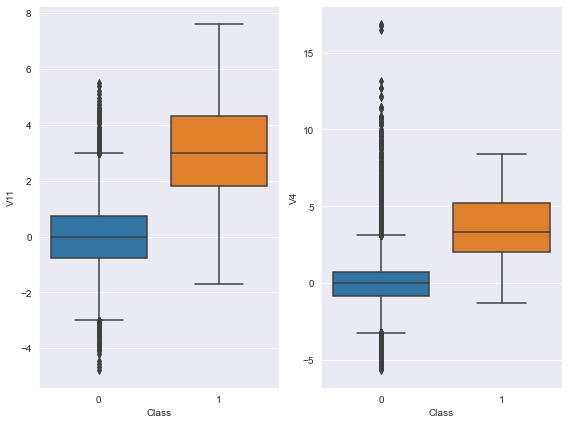

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=df_sm_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=df_sm_train, ax=ax[1])

plt.show()

## Modelling after SMOTE

In [72]:
y_sm_new = df_sm_train.Class
X_sm_new = df_sm_train.loc[:, df_sm_train.columns != 'Class']

In [73]:
y_sm_new.value_counts()

0    227434
1    168568
Name: Class, dtype: int64

In [74]:
rf_sm_model = RandomForestClassifier(max_depth=6, max_features=5, min_samples_split=7, n_estimators=100)
rf_sm_model.fit(X_sm_new, y_sm_new)
rf_sm_yhat = rf_sm_model.predict(X_sm_new)
print(classification_report(y_sm_new, rf_sm_yhat))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    227434
           1       1.00      0.90      0.94    168568

    accuracy                           0.96    396002
   macro avg       0.96      0.95      0.95    396002
weighted avg       0.96      0.96      0.95    396002



In [75]:
rf_sm_test_yhat = rf_sm_model.predict(X_test)
print(classification_report(y_test, rf_sm_test_yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.38      0.81      0.52       104

    accuracy                           1.00     56962
   macro avg       0.69      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962



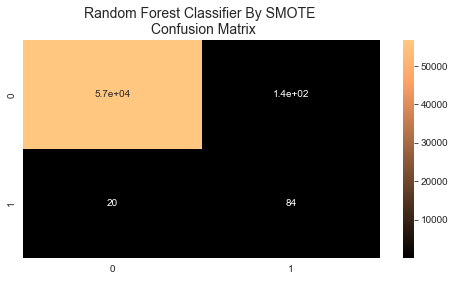

In [76]:
plt.figure(figsize = (8, 4))
rf_sm_cf = confusion_matrix(y_test, rf_sm_test_yhat)
sns.heatmap(rf_sm_cf, annot=True, cmap=plt.cm.copper)
plt.title("Random Forest Classifier By SMOTE \n Confusion Matrix", fontsize=14)
plt.show()

In [78]:
# Final Score in the test set of Random Forest Classifier
from sklearn.metrics import accuracy_score


undersample_score = accuracy_score(y_test, rf_test_yhat)

oversample_score = accuracy_score(y_test, rf_sm_test_yhat)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.982708
1,Oversampling (SMOTE),0.997244


## Final Result

As we can see from the above test scores, the SMOTE method has performed better than random undersampling in this scenario.The Random underSampling technique is getting 98.27% and the Oversampling (SMOTE) getting 99.72%. 